In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

#from solardatatools import signal_decompositions as sd
#from solardatatools.signal_decompositions_osd import osd_l2_l1d1_l2d2p365
from gfosd import Problem 
from gfosd.components import *

np.random.seed(12) # reload each time to get first instance of seed

## Three-Component Signal 

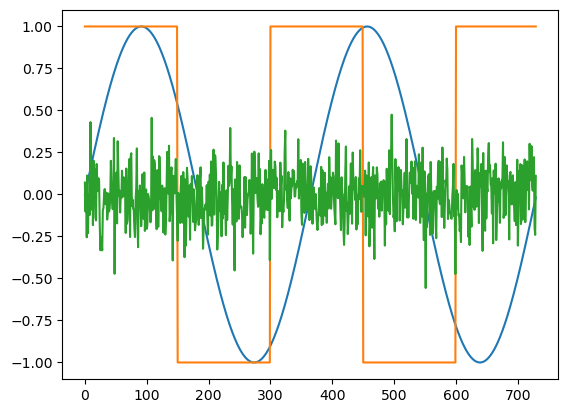

In [2]:
t = np.arange(365*2)

# signal1 = np.sin(2 * np.pi * t / 365) # 365
# signal2 = signal.square(2 * np.pi * t / 270) 

signal1 = np.sin(2 * np.pi * t / 365) # 365
signal2 = signal.square(2 * np.pi * t / 300) 

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = 0.15 * np.random.randn(len(signal1))
X_real[1] = signal1
X_real[2] = signal2
y = np.sum(X_real, axis=0)
K, T = X_real.shape

plt.plot(signal1)
plt.plot(signal2)
plt.plot(X_real[0])

# s_hat, s_seas, s_error = osd_l2_l1d1_l2d2p365(y)

In [3]:
from solardatatools.osd_cvx_comp import osd_l2_l1d1_l2d2p365, cvx_l2_l1d1_l2d2p365

In [4]:
osd_s_hat_mosek, osd_s_seas_mosek, osd_s_error_mosek, obj_osd_mosek = osd_l2_l1d1_l2d2p365(y, w1=15e4, w2=0.9, solver="MOSEK")

In [5]:
osd_s_hat_qss, osd_s_seas_qss, osd_s_error_qss, obj_osd_qss = osd_l2_l1d1_l2d2p365(y, w1=15e4, w2=0.9, solver="QSS")

In [6]:
expected_s_hat_mosek, expected_s_seas_mosek, expected_s_error_mosek, obj_cvx = cvx_l2_l1d1_l2d2p365(y, c1=10, c2=500, solver="MOSEK")

In [7]:
obj_cvx = cvx_l2_l1d1_l2d2p365(y,
                             c1=10,
                             c2=500,
                             solver="MOSEK",
                             s_hat_osd=osd_s_hat_mosek,
                             s_seas_osd=osd_s_seas_mosek,
                             s_error_osd=osd_s_error_mosek
                            )

original shat  [0.91328583 0.91328583]
original obj  118.71022299936212
new shat  [1.00631453 1.00631454]
new obj  129.48176210130754


In [8]:
obj_cvx = cvx_l2_l1d1_l2d2p365(y,
                             c1=10,
                             c2=500,
                             solver="MOSEK",
                             s_hat_osd=osd_s_hat_qss,
                             s_seas_osd=osd_s_seas_qss,
                             s_error_osd=osd_s_error_qss
                            )

original shat  [0.91328583 0.91328583]
original obj  118.71022299936212
new shat  [1.00617619 1.00617619]
new obj  129.47555496802667


In [31]:
print(f"osd-qss obj_value   {obj_osd:.3f}")
print(f"osd-mosek obj_value {obj_osd:.3f}")
print(f"cvx-mosek obj_value {obj_cvx:.3f}")


osd-qss obj_value   0.052
osd-mosek obj_value 0.052
cvx-mosek obj_value 150.538


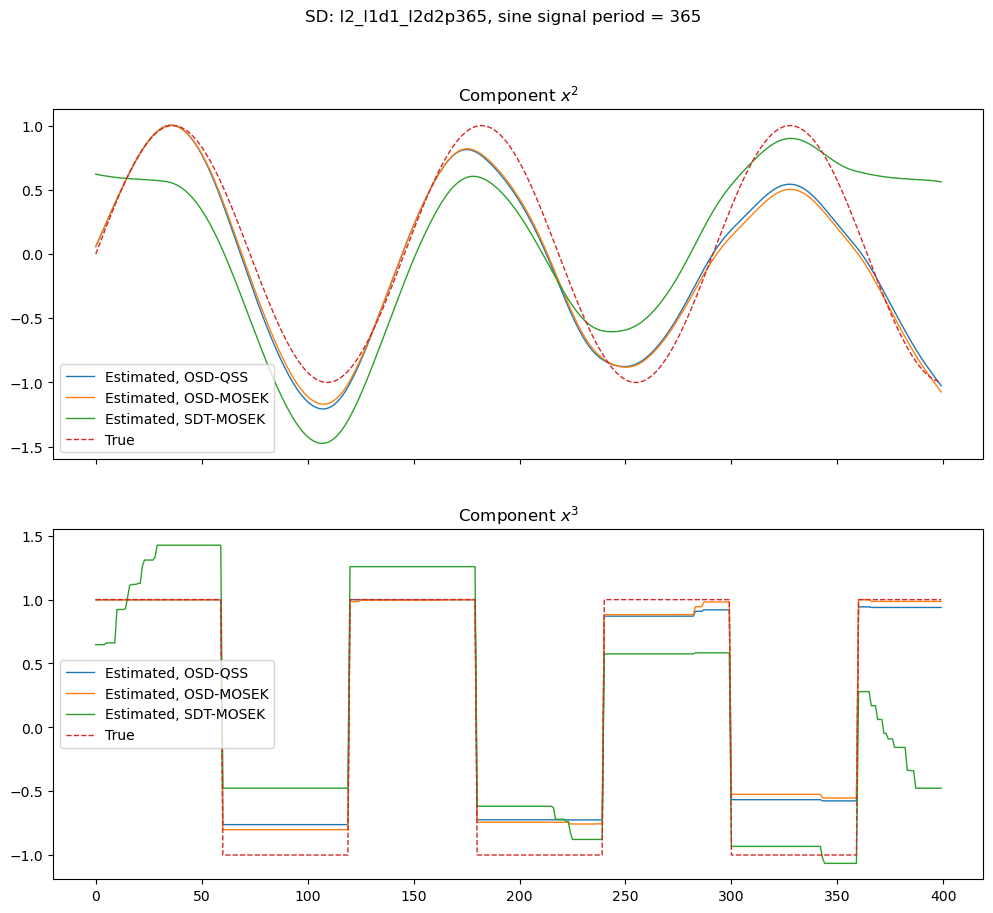

In [227]:
# 500, 450
# osd_s_hat_mosek, osd_s_seas_mosek, osd_s_error_mosek, obj_osd_mosek = osd_l2_l1d1_l2d2p365(y, w1=4e4, w2=0.9, solver="MOSEK")
# osd_s_hat_qss, osd_s_seas_qss, osd_s_error_qss, obj_osd_qss = osd_l2_l1d1_l2d2p365(y, w1=4e4, w2=0.9, solver="QSS")
# expected_s_hat_mosek, expected_s_seas_mosek, expected_s_error_mosek, obj_cvx = cvx_l2_l1d1_l2d2p365(y, c1=10, c2=1e3, solver="MOSEK")

osd_s_hat_mosek, osd_s_seas_mosek, osd_s_error_mosek, obj_osd_mosek = osd_l2_l1d1_l2d2p365(y, w1=5e3, w2=0.8, solver="MOSEK")
osd_s_hat_qss, osd_s_seas_qss, osd_s_error_qss, obj_osd_qss = osd_l2_l1d1_l2d2p365(y, w1=5e3, w2=0.9, solver="QSS")
expected_s_hat_mosek, expected_s_seas_mosek, expected_s_error_mosek, obj_cvx = cvx_l2_l1d1_l2d2p365(y, c1=3, c2=450, solver="MOSEK")

mosek_decomp_new = np.array([osd_s_error_mosek, osd_s_seas_mosek, osd_s_hat_mosek])
qss_decomp_new = np.array([osd_s_error_qss, osd_s_seas_qss, osd_s_hat_qss])

fig, axs = plt.subplots(2, sharex=True, figsize=(12,10))
fig.suptitle('SD: l2_l1d1_l2d2p365, sine signal period = 365')

# x1: noise
# #axs[2].plot(qss_decomp_new[0], label="estimated, osd-qss", linewidth=0, marker=".", markersize=3)
# axs[2].plot(mosek_decomp_new[0], label="estimated, osd-mosek", linewidth=0, marker=".", markersize=3)
# #axs[2].plot(expected_s_error_mosek, label="estimated, sdt-mosek", linewidth=0, marker=".",  markersize=3)
# axs[2].plot(X_real[0], label="True", linewidth=1, linestyle="--")
# axs[2].set_title("component $x^1$")

# x2: periodic
axs[0].plot(qss_decomp_new[1], label="Estimated, OSD-QSS", linewidth=1)
axs[0].plot(mosek_decomp_new[1], label="Estimated, OSD-MOSEK", linewidth=1)
axs[0].plot(expected_s_seas_mosek, label="Estimated, SDT-MOSEK", linewidth=1)
axs[0].plot(X_real[1], label="True", linestyle="--", linewidth=1)
axs[0].set_title("Component $x^2$")


# x3: piecewise
axs[1].plot(qss_decomp_new[2], label="Estimated, OSD-QSS", linewidth=1)
axs[1].plot(mosek_decomp_new[2], label="Estimated, OSD-MOSEK", linewidth=1)
axs[1].plot(expected_s_hat_mosek, label="Estimated, SDT-MOSEK", linewidth=1)
axs[1].plot(X_real[2], label="True", linewidth=1, linestyle="--")
axs[1].set_title("Component $x^3$")

# sum
# axs[3].plot(qss_decomp_new.sum(axis=0), label="estimated, sdt-osd", linestyle="--", alpha=0.5, linewidth=1)
# mosek_signal = np.array([expected_s_error_mosek,expected_s_seas_mosek,expected_s_hat_mosek])
# axs[3].plot(mosek_signal.sum(axis=0), label="estimated, sdt-mosek", linestyle="--", alpha=0.5, linewidth=1)
# axs[3].plot(y, label="True", linewidth=1, linestyle="--")
# axs[3].set_title("composed signal")


for i in range(len(axs)):
    axs[i].legend()

In [8]:
osd_s_hat, osd_s_seas, osd_s_error = osd_l2_l1d1_l2d2p365(y, yearly_periodic=True)

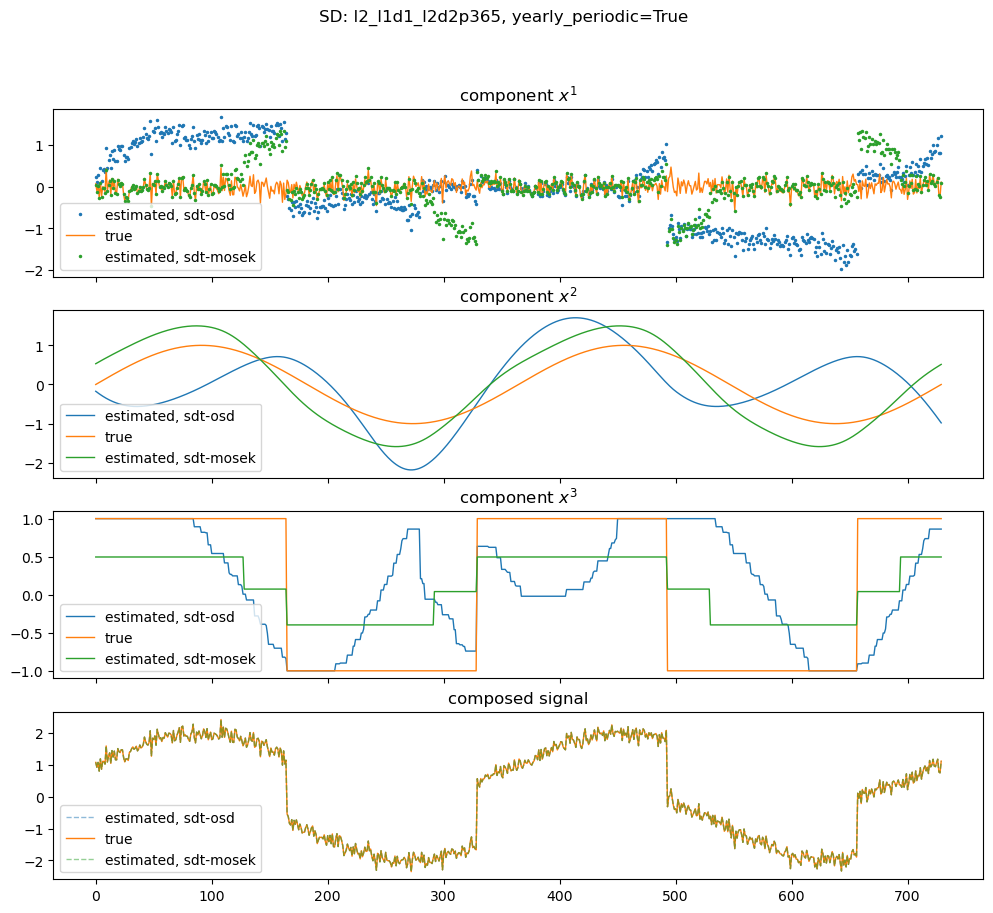

In [9]:
qss_decomp_new = np.array([osd_s_error, osd_s_seas, osd_s_hat])

fig, axs = plt.subplots(4, sharex=True, figsize=(12,10))
fig.suptitle('SD: l2_l1d1_l2d2p365, yearly_periodic=True')

# x1: noise
axs[0].plot(qss_decomp_new[0], label="estimated, sdt-osd", linewidth=0, marker=".", markersize=3)
axs[0].plot(X_real[0], label="true", linewidth=1)
axs[0].plot(expected_s_error_mosek, label="estimated, sdt-mosek", linewidth=0, marker=".",  markersize=3)
axs[0].set_title("component $x^1$")

# x2: periodic
axs[1].plot(qss_decomp_new[1], label="estimated, sdt-osd", linewidth=1)
axs[1].plot(X_real[1], label="true", linestyle="-", linewidth=1)
axs[1].plot(expected_s_seas_mosek, label="estimated, sdt-mosek", linewidth=1)
axs[1].set_title("component $x^2$")


# x3: piecewise
axs[2].plot(qss_decomp_new[2], label="estimated, sdt-osd", linewidth=1)
axs[2].plot(X_real[2], label="true", linestyle="-", linewidth=1)
axs[2].plot(expected_s_hat_mosek, label="estimated, sdt-mosek", linewidth=1)
axs[2].set_title("component $x^3$")

# sum
axs[3].plot(qss_decomp_new.sum(axis=0), label="estimated, sdt-osd", linestyle="--", alpha=0.5, linewidth=1)
axs[3].plot(y, label="true", linestyle="-", linewidth=1)
mosek_signal = np.array([expected_s_error_mosek,expected_s_seas_mosek,expected_s_hat_mosek])
axs[3].plot(mosek_signal.sum(axis=0), label="estimated, sdt-mosek", linestyle="--", alpha=0.5, linewidth=1)
axs[3].set_title("composed signal")


for i in range(len(axs)):
    axs[i].legend()